### Analyzing responses from the Stack Overflow Annual Developer Survey 2020

In [4]:
import os
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv(r'D:\Python\survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame.


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText. We can load it as Pandas Series with Column as the index and the QuestionText as the value.

In [3]:
schema_fname = r'D:\Python\FreeCodeCamp\python-eda-stackoverflow-survey\survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

NameError: name 'pd' is not defined

In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [7]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

    Demographics of the survey respondents and the global programming community
    Distribution of programming skills, experience, and preferences
    Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame survey_df.

In [10]:
survey_df = survey_raw_df[selected_columns].copy()

In [11]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.


In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values. Need to convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.


In [13]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

some basic statistics about numeric columns

In [14]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Age column has the minimum value as 1 and the maximum as 279

In [15]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for WorkWeekHrs. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [16]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis

In [17]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [18]:
import numpy as np

In [19]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame

In [20]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
38242,Sweden,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;TypeScript,C;C#;SQL;TypeScript,Every few months,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
12333,Portugal,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,15.0,18.0,13.0,C#;HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Never,Somewhat important
5699,Australia,16.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,10.0,5.0,NaN,Bash/Shell/PowerShell;C++;HTML/CSS;Python;Swift,Bash/Shell/PowerShell;C++;HTML/CSS;Python,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN
26009,Germany,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,16.0,20.0,10.0,Dart;HTML/CSS;Java;JavaScript;TypeScript,C#;Python,Every few months,Visit Stack Overflow;Watch help / tutorial videos,"Independent contractor, freelancer, or self-em...","Developer, front-end;Developer, full-stack;Dev...",NaN,Neither satisfied nor dissatisfied,Diversity of the company or organization;Flex ...,Occasionally: 1-2 days per quarter but less th...,Very important
15939,Sweden,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,10.0,7.0,3.0,Bash/Shell/PowerShell;C;Java;JavaScript;Python...,Dart;Go;Kotlin;Python;Rust;SQL,Every few months,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,Data scientist or machine learning specialist;...,45.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Sometimes: 1-2 days per month but less than we...,Somewhat important
36789,Turkey,33.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,14.0,11.0,C#;Java;JavaScript;Objective-C;PHP;SQL;Swift,Go;Python,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Academic researcher;Designer;Developer, front-...",45.0,Slightly satisfied,Flex time or a flexible schedule;Financial per...,Rarely: 1-2 days per year or less,Somewhat important
61959,Italy,NaN,NaN,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,14.0,7.0,3.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,Very dissatisfied,NaN,NaN,Very important
33618,Japan,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,13.0,NaN,C++;Java,C;C++;JavaScript;Python;TypeScript,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, desktop or enterprise applications",45.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Critically important
28310,Australia,59.0,Man,"Associate degree (A.A., A.S., etc.)","Information systems, information technology, o...",Yes,16.0,43.0,35.0,Bash/Shell/PowerShell;SQL;VBA,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst;Database administrato...,42.0,Slightly satisfied,Remote work options;Office environment or comp...,Often: 1-2 days per week or more,Fairly important
32620,Canada,39.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,27.0,17.0,Bash/Shell/PowerShell;C#;C++;Java;Python,Bash/Shell/PowerShell;C#;Pytho

## Exploratory Analysis and Visualization

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.


In [22]:
schema.Country

'Where do you live?'

In [23]:
survey_df.Country.nunique()

183

In [24]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

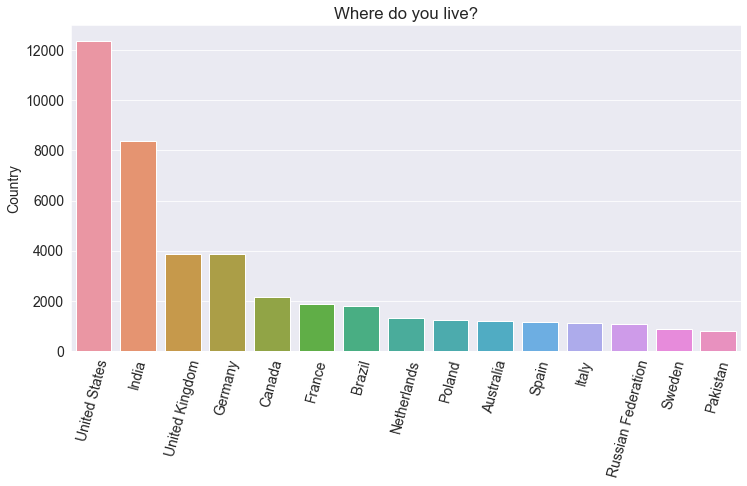

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

In [26]:
lan_df = pd.read_csv(r'D:\Python\FreeCodeCamp\python-eda-stackoverflow-survey\countries-languages.csv')

In [27]:
lan_df

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [43]:
lan_df[lan_df["Languages Spoken"].str.contains('English')]["Country"].count() / 198 * 100

48.484848484848484

about 48% is english-spoken countries

## Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it.


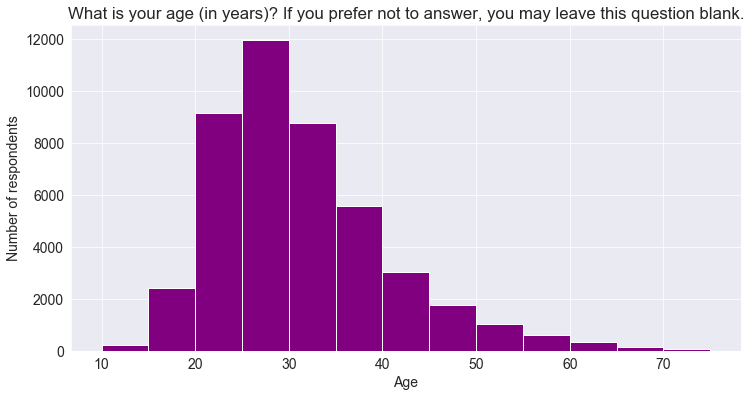

In [44]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

In [46]:
survey_df["AgeGroup"] = np.where(survey_df["Age"] < 18, "less than 18",  np.where(survey_df["Age"] < 30, "18-30",  np.where(survey_df["Age"] < 45, "31-45", "more than 45")))

In [47]:
survey_df["AgeGroup"]

0        more than 45
1        more than 45
2        more than 45
3               18-30
4               31-45
             ...     
64456    more than 45
64457    more than 45
64458    more than 45
64459    more than 45
64460    more than 45
Name: AgeGroup, Length: 64306, dtype: object

Split our data by age 

## Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.


In [48]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [49]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

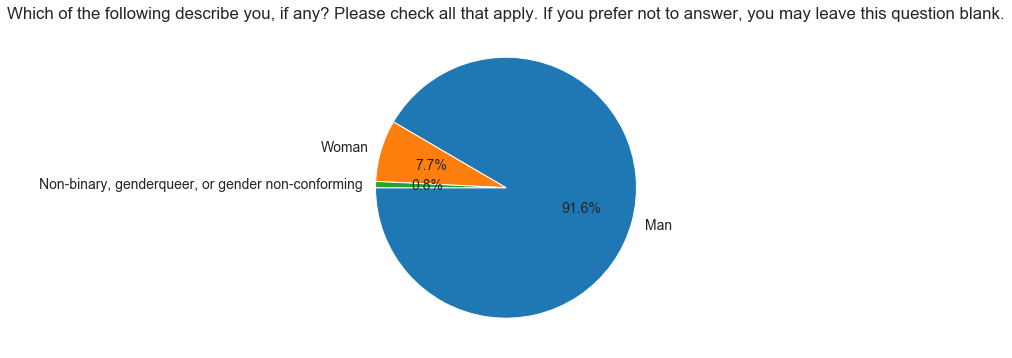

In [50]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

## Education Level

Nowdays formal education in computer science is not considered an essential requirement for becoming a programmer. There are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.


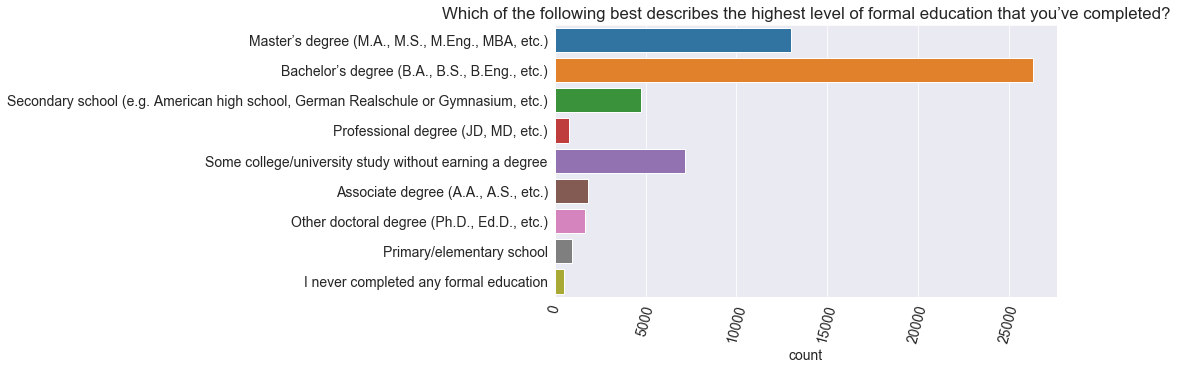

In [51]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

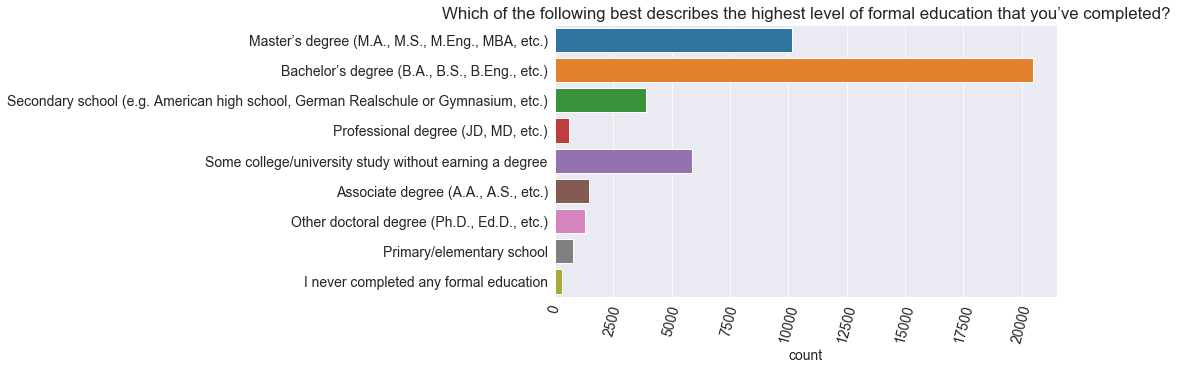

In [55]:
sns.countplot(y=survey_df[survey_df.Gender == "Man"].EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

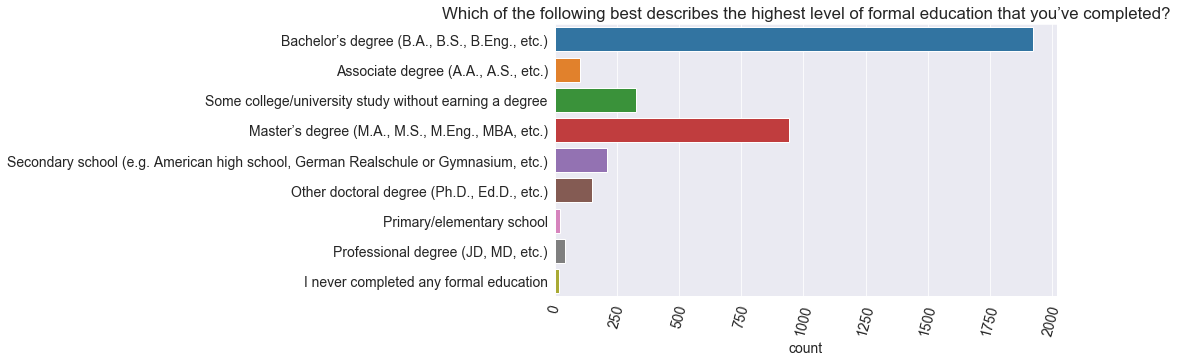

In [56]:
sns.countplot(y=survey_df[survey_df.Gender == "Woman"].EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [60]:
schema.UndergradMajor

'What was your primary field of study?'

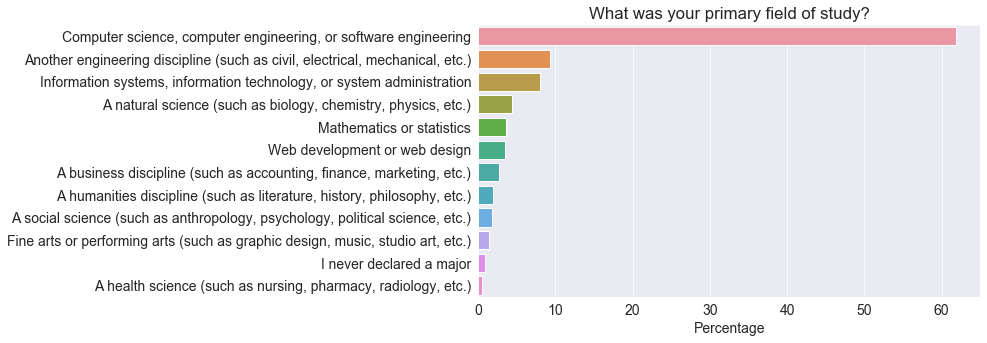

In [61]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

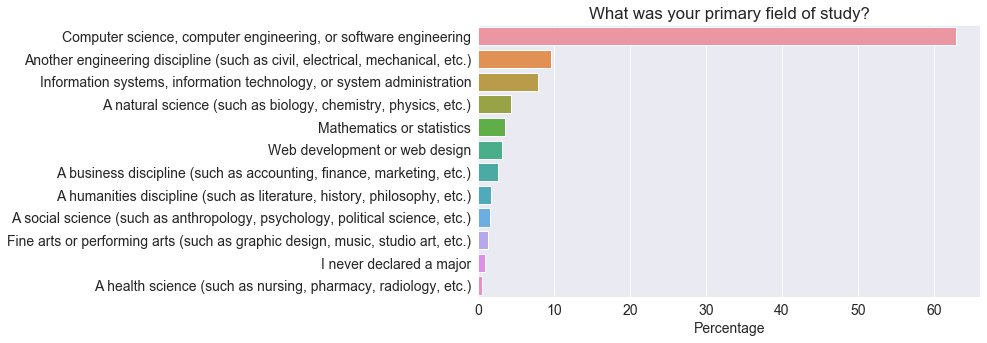

In [66]:
undergrad_pct_man = survey_df[survey_df.Gender == "Man"].UndergradMajor.value_counts() * 100 / survey_df[survey_df.Gender == "Man"].UndergradMajor.count()

sns.barplot(x=undergrad_pct_man, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

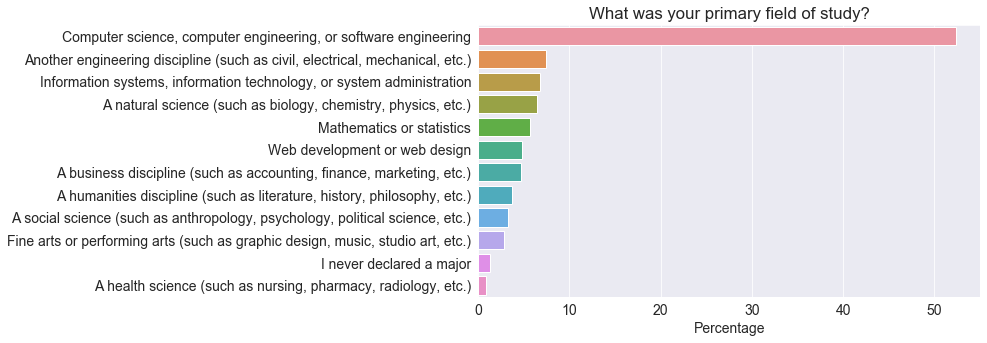

In [67]:
undergrad_pct_woman = survey_df[survey_df.Gender == "Woman"].UndergradMajor.value_counts() * 100 / survey_df[survey_df.Gender == "Woman"].UndergradMajor.count()

sns.barplot(x=undergrad_pct_woman, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

In [68]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [69]:
survey_df.NEWEdImpt

0                          Fairly important
1                          Fairly important
2                                       NaN
3        Not at all important/not necessary
4                            Very important
                        ...                
64456                        Very important
64457                                   NaN
64458                                   NaN
64459                                   NaN
64460                  Critically important
Name: NEWEdImpt, Length: 64306, dtype: object

importance of formal education for UndergradMajor 

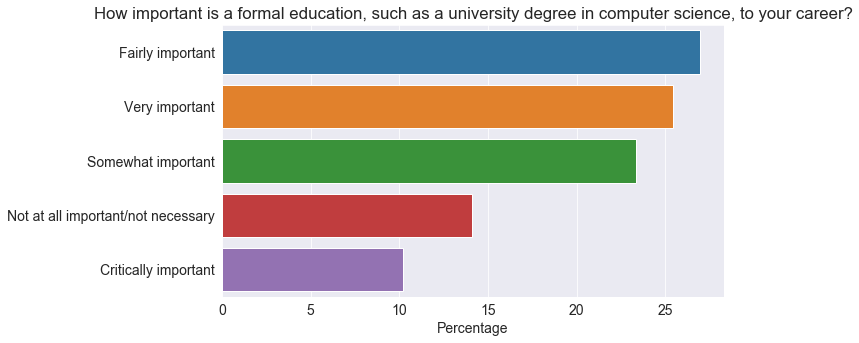

In [79]:
imp_pct = survey_df[pd.notna(survey_df["UndergradMajor"])].NEWEdImpt.value_counts() * 100 / survey_df[pd.notna(survey_df["UndergradMajor"])].NEWEdImpt.count()

sns.barplot(x=imp_pct, y=imp_pct.index)

plt.title(schema.NEWEdImpt)
plt.ylabel(None);
plt.xlabel('Percentage');

importance of formal education not for UndergradMajor

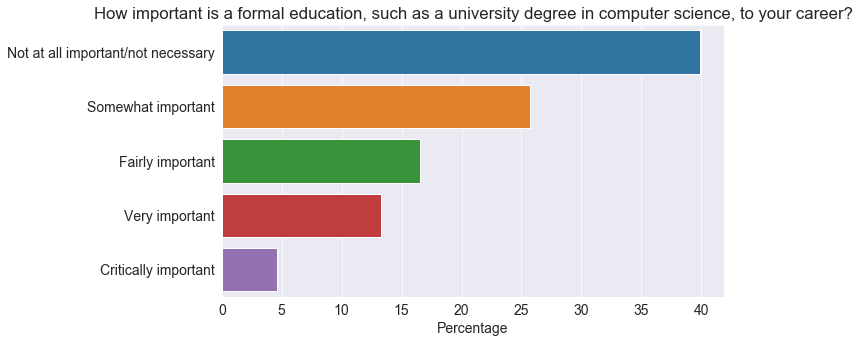

In [81]:
imp_pct = survey_df[pd.isna(survey_df["UndergradMajor"])].NEWEdImpt.value_counts() * 100 / survey_df[pd.isna(survey_df["UndergradMajor"])].NEWEdImpt.count()

sns.barplot(x=imp_pct, y=imp_pct.index)

plt.title(schema.NEWEdImpt)
plt.ylabel(None);
plt.xlabel('Percentage');

Most of those who hold some college degree suppose that formal education is important, when those who dont think that this is not so important

Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column.


In [82]:
schema.Employment

'Which of the following best describes your current employment status?'

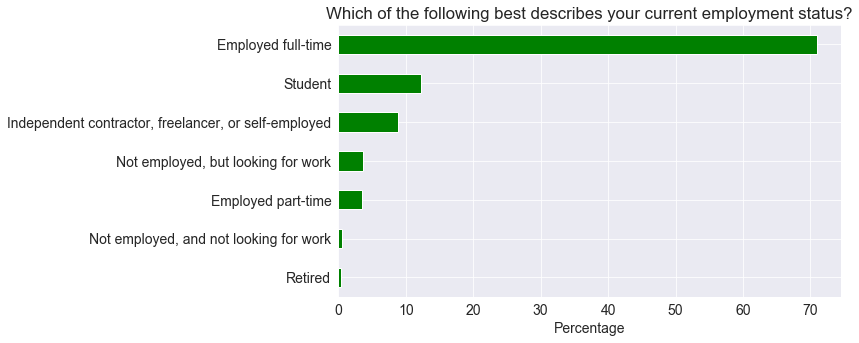

In [83]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

In [90]:
survey_df["EmploymentType"] = np.where(survey_df["Employment"].str.contains("but looking for", na=False) | survey_df["Employment"].str.contains("Student", na=False), "Enthusiast",  np.where(survey_df["Employment"].str.contains("full-time", na=False) | survey_df["Employment"].str.contains("freelancer", na=False) | survey_df["Employment"].str.contains("part-time", na=False), "Professional",  "Other"))

In [92]:
survey_df["EmploymentType"]

0        Professional
1        Professional
2               Other
3               Other
4        Professional
             ...     
64456    Professional
64457    Professional
64458           Other
64459    Professional
64460    Professional
Name: EmploymentType, Length: 64306, dtype: object

Split the data into Professionals and Enthutheasts

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [93]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [94]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                  4396
Developer, back-end                                                                                                                                                    3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                         2214
Developer, back-end;Developer, full-stack                                                                                                                              1465
Developer, front-end                                                                                                                                                   1390
                                                                                                                                            

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [95]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [96]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [97]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.

We can now use the column-wise totals to identify the most common roles.

In [98]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name.

Lets figure out what percentage of respondents work in roles related to data science.

In [120]:
ds_pct = len(dev_type_df[dev_type_df["Data or business analyst"] | dev_type_df["Data scientist or machine learning specialist"] | dev_type_df["Engineer, data"] | dev_type_df["Scientist"]].axes[0]) / len(dev_type_df.axes[0]) *100

In [121]:
ds_pct

14.891300967250334

In [117]:
len(dev_type_df[dev_type_df["Data or business analyst"] | dev_type_df["Data scientist or machine learning specialist"] | dev_type_df["Engineer, data"] | dev_type_df["Scientist"]].axes[0])

9576

Which positions have the highest percentage of women?

In [129]:
temp_df = survey_df.join(dev_type_df)

In [135]:
pos_pct_w = {}
for i in list(dev_type_df):
    pos_pct_w[i] = temp_df[i].where(temp_df.Gender == "Woman").sum() / temp_df[i].sum() * 100

In [136]:
pos_pct_w

{'Developer, desktop or enterprise applications': 3.7049713356721146,
 'Developer, full-stack': 5.48393089355378,
 'Developer, mobile': 4.86923240484797,
 'Designer': 6.328392246294184,
 'Developer, front-end': 6.597528684907325,
 'Developer, back-end': 4.9229515483775375,
 'Developer, QA or test': 6.447469817621372,
 'DevOps specialist': 2.603550295857988,
 'Developer, game or graphics': 3.816793893129771,
 'Database administrator': 3.923647932131495,
 'Developer, embedded applications or devices': 3.2546266751754946,
 'Engineer, data': 5.027027027027027,
 'Educator': 6.14853195164076,
 'System administrator': 2.6422372227579554,
 'Engineering manager': 3.593923675435346,
 'Product manager': 4.573047349251316,
 'Data or business analyst': 7.103274559193955,
 'Academic researcher': 6.08223872073101,
 'Data scientist or machine learning specialist': 7.768469154607768,
 'Scientist': 5.825242718446602,
 'Senior executive/VP': 3.560371517027864,
 'Engineer, site reliability': 3.17542946382

The highest percentage of women among such fields as Marketing, Data science and Analythics

## Asking and Answering Questions

**Q: What are the most popular programming languages in 2020?**



In [137]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [138]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [139]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [140]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can plot this information using a horizontal bar chart.

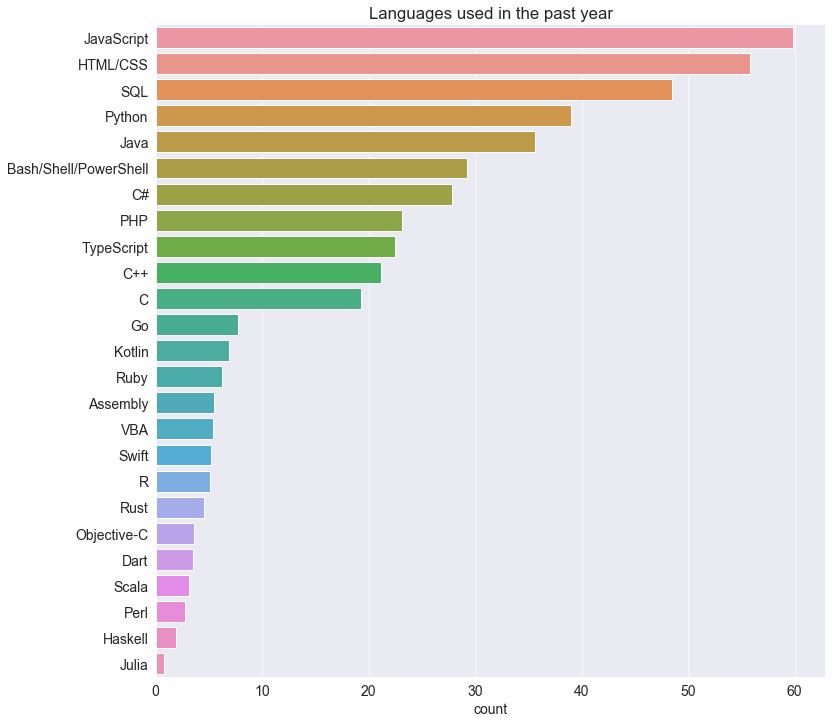

In [141]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

###### Q: What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?

In [145]:
lang_list = list(languages_worked_df)
lang_list

['C#',
 'HTML/CSS',
 'JavaScript',
 'Swift',
 'Objective-C',
 'Python',
 'Ruby',
 'SQL',
 'Java',
 'PHP',
 'C',
 'TypeScript',
 'Bash/Shell/PowerShell',
 'Kotlin',
 'R',
 'VBA',
 'Perl',
 'Scala',
 'C++',
 'Go',
 'Haskell',
 'Rust',
 'Dart',
 'Julia',
 'Assembly']

In [143]:
temp_df = survey_df.join(languages_worked_df)

In [146]:
languages_worked_s_percentages = temp_df[lang_list].where(temp_df["Employment"] == "Student").mean().sort_values(ascending=False) * 100

In [188]:
languages_worked_s_percentages

HTML/CSS                 59.749160
Python                   56.490820
JavaScript               52.275666
Java                     49.107836
C++                      41.802431
C                        40.884407
SQL                      39.216447
Bash/Shell/PowerShell    25.536592
C#                       24.605637
PHP                      23.674683
Assembly                 13.317817
TypeScript               11.546418
R                         7.408844
Rust                      7.357124
Kotlin                    7.008017
Go                        5.986553
Dart                      5.391777
Swift                     4.641841
Haskell                   4.085855
Ruby                      3.904836
VBA                       3.878976
Scala                     2.068787
Objective-C               2.042927
Perl                      1.409361
Julia                     1.318852
dtype: float64

In [148]:
languages_worked_p_percentages = temp_df[lang_list].where(temp_df["EmploymentType"] == "Professional").mean().sort_values(ascending=False) * 100

In [186]:
languages_worked_p_percentages

JavaScript               62.057336
HTML/CSS                 55.766717
SQL                      50.717168
Python                   36.838017
Java                     34.132292
Bash/Shell/PowerShell    30.634557
C#                       28.978532
TypeScript               24.840366
PHP                      23.239290
C++                      18.077951
C                        15.993709
Go                        8.251701
Kotlin                    7.027683
Ruby                      6.650624
VBA                       5.644504
Swift                     5.401974
R                         4.789965
Assembly                  4.204483
Rust                      4.098376
Objective-C               3.922163
Scala                     3.454156
Dart                      3.281733
Perl                      2.989939
Haskell                   1.553707
Julia                     0.687800
dtype: float64

prepare our data for visualization

In [195]:
worked_with_pct_df = pd.DataFrame({'Lang':languages_worked_s_percentages.index, 'Percentage':languages_worked_s_percentages.values})

In [196]:
worked_with_pct_df["Group"] = "S"

In [204]:
for index, elem in zip(languages_worked_p_percentages.index,languages_worked_p_percentages):
    new_row = {"Lang": index, "Percentage": elem, "Group": "P"}
    worked_with_pct_df = worked_with_pct_df.append(new_row, ignore_index=True)

In [205]:
worked_with_pct_df

,Lang,Percentage,Group
0,HTML/CSS,59.749160,S
1,Python,56.490820,S
2,JavaScript,52.275666,S
3,Java,49.107836,S
4,C++,41.802431,S
5,C,40.884407,S
6,SQL,39.216447,S
7,Bash/Shell/PowerShell,25.536592,S
8,C#,24.605637,S
9,PHP,23.674683,S


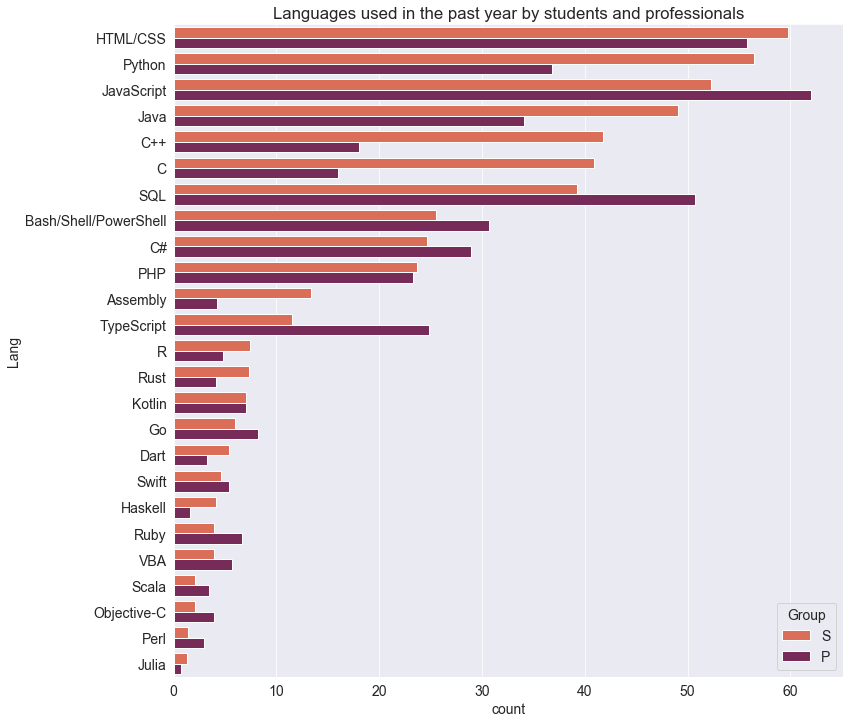

In [216]:
plt.figure(figsize=(12, 12))
sns.barplot(x="Percentage", y="Lang", hue="Group", data = worked_with_pct_df, palette = 'rocket_r')
plt.title("Languages used in the past year by students and professionals");
plt.xlabel('count');

##### Q: What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?

In [217]:
dont_front_df = survey_df.join(dev_type_df)

In [218]:
dont_front_df = dont_front_df.join(languages_worked_df)
dont_front_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,False,False,False,False,False,False,False,False,False,False
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,False,False,False,False,False,False,False,False,False,False
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,False,False,False,False,False,False,False,False,False,False
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,True,True,True,True,True,True,True,True,True,True
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,False,False,False,False,False,False,False,False,False,False


In [219]:
lan_worked_not_front_pct = dont_front_df[lang_list].where(~dont_front_df["Developer, front-end"]).mean().sort_values(ascending=False) * 100

In [220]:
lan_worked_not_front_pct

JavaScript               50.433107
HTML/CSS                 46.983412
SQL                      45.337607
Python                   42.039499
Java                     36.363636
Bash/Shell/PowerShell    29.219542
C#                       25.577115
C++                      23.121400
C                        21.051150
PHP                      19.420503
TypeScript               15.983802
Go                        7.854390
Kotlin                    6.968686
Assembly                  6.050500
R                         5.903244
Ruby                      5.827450
VBA                       5.030534
Swift                     4.980727
Rust                      4.753346
Scala                     3.490840
Objective-C               3.328425
Dart                      3.179003
Perl                      2.823856
Haskell                   1.970635
Julia                     0.926848
dtype: float64

Among respondents who do not describe themselves as "Developer, front-end" the most popular languages are JS, HTML/CSS and SQL as this stack is used by such developers as full-stack. Also JS used for mobile or AR development, for example.

##### Q:What are the most common languages used by developers older than 35 years of age?

In [223]:
lan_worked_over_35_pct = temp_df[lang_list].where(temp_df["Age"] > 35).mean().sort_values(ascending=False) * 100

In [224]:
lan_worked_over_35_pct

JavaScript               64.874070
SQL                      59.191539
HTML/CSS                 58.510352
Bash/Shell/PowerShell    40.198978
Python                   37.716232
C#                       35.170745
Java                     32.356368
PHP                      22.757014
TypeScript               22.559828
C++                      18.929820
C                        17.325446
VBA                       8.729945
Go                        8.694093
Ruby                      8.192166
Perl                      6.417496
Swift                     5.727346
Kotlin                    5.548086
R                         5.521197
Assembly                  5.090974
Objective-C               4.678677
Rust                      3.916824
Scala                     3.531415
Dart                      2.169042
Haskell                   1.353410
Julia                     0.842520
dtype: float64

Among developers with the age over 35 JS, SQL and HTML are extremely popular, whereas the students use more Python or Java 

##### Q: What are the most common languages used by developers in Russia?

In [225]:
lan_worked_Russia_pct = temp_df[lang_list].where(temp_df["Country"] == "Russian Federation").mean().sort_values(ascending=False) * 100

In [226]:
lan_worked_Russia_pct

JavaScript               49.677419
SQL                      45.990783
HTML/CSS                 45.069124
Python                   38.341014
Bash/Shell/PowerShell    30.414747
C#                       28.202765
Java                     27.741935
C++                      21.935484
TypeScript               20.460829
PHP                      17.142857
C                        15.483871
Kotlin                   10.230415
Go                        8.940092
Rust                      6.451613
Ruby                      5.714286
Assembly                  5.345622
Swift                     4.976959
VBA                       4.147465
Scala                     3.963134
R                         3.870968
Objective-C               3.502304
Perl                      3.410138
Dart                      2.580645
Haskell                   1.843318
Julia                     0.460829
dtype: float64

**Q: Which languages are the most people interested to learn over the next year?**

For this, we can use the LanguageDesireNextYear column, with similar processing as the previous one.


In [227]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

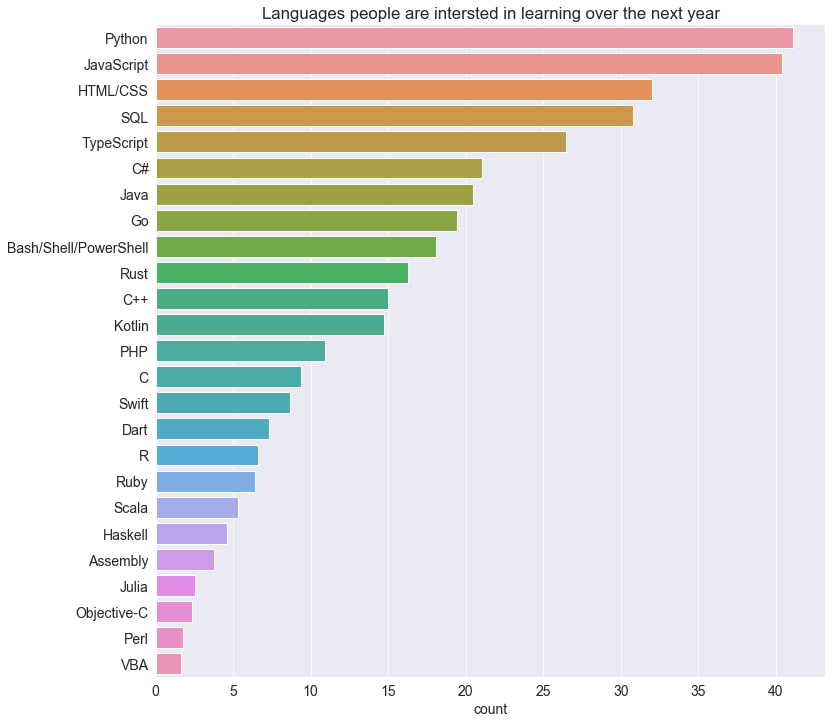

In [228]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc.

In [229]:
temp_df_nextlang = survey_df.join(languages_interested_df)

In [230]:
lang_list_int = list(languages_interested_df)

In [231]:
languages_int_s_percentages = temp_df_nextlang[lang_list_int].where(temp_df_nextlang["Employment"] == "Student").mean().sort_values(ascending=False) * 100

In [232]:
languages_int_p_percentages = temp_df_nextlang[lang_list].where(temp_df_nextlang["EmploymentType"] == "Professional").mean().sort_values(ascending=False) * 100

In [233]:
work_int_pct_df = pd.DataFrame({'Lang':languages_int_s_percentages.index, 'Percentage':languages_int_s_percentages.values})

In [234]:
work_int_pct_df["Group"] = "S"

In [235]:
for index, elem in zip(languages_int_p_percentages.index,languages_int_p_percentages):
    new_row = {"Lang": index, "Percentage": elem, "Group": "P"}
    work_int_pct_df = work_int_pct_df.append(new_row, ignore_index=True)

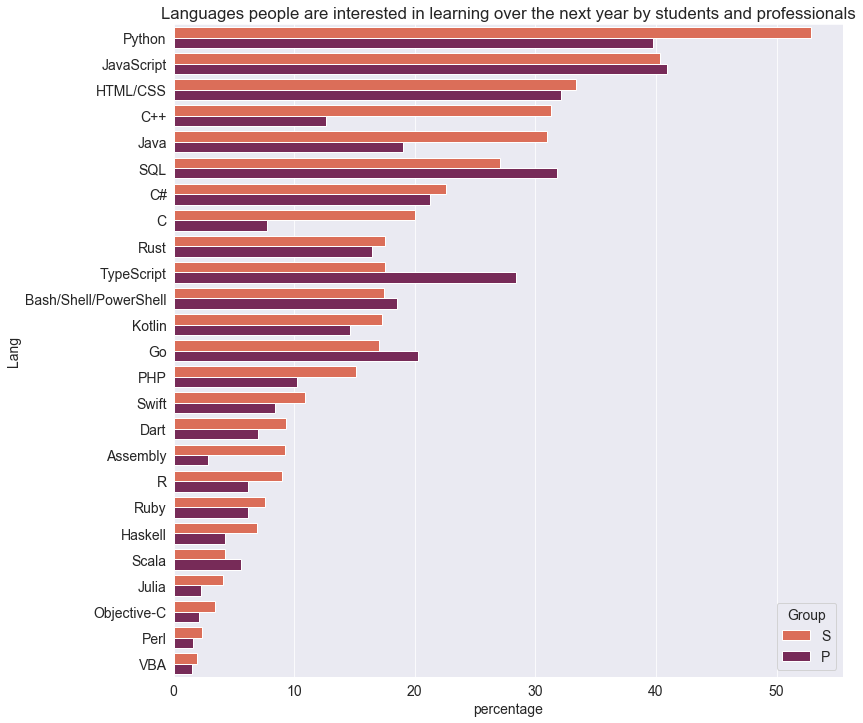

In [237]:
plt.figure(figsize=(12, 12))
sns.barplot(x="Percentage", y="Lang", hue="Group", data = work_int_pct_df, palette = 'rocket_r')
plt.title("Languages people are interested in learning over the next year by students and professionals");
plt.xlabel('percentage');

So we can see, that students more often want to learn python, java and c++, and there are more professionals would like to work with type script or sql

**Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?** 

We can:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [238]:
languages_loved_df = languages_worked_df & languages_interested_df

In [239]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

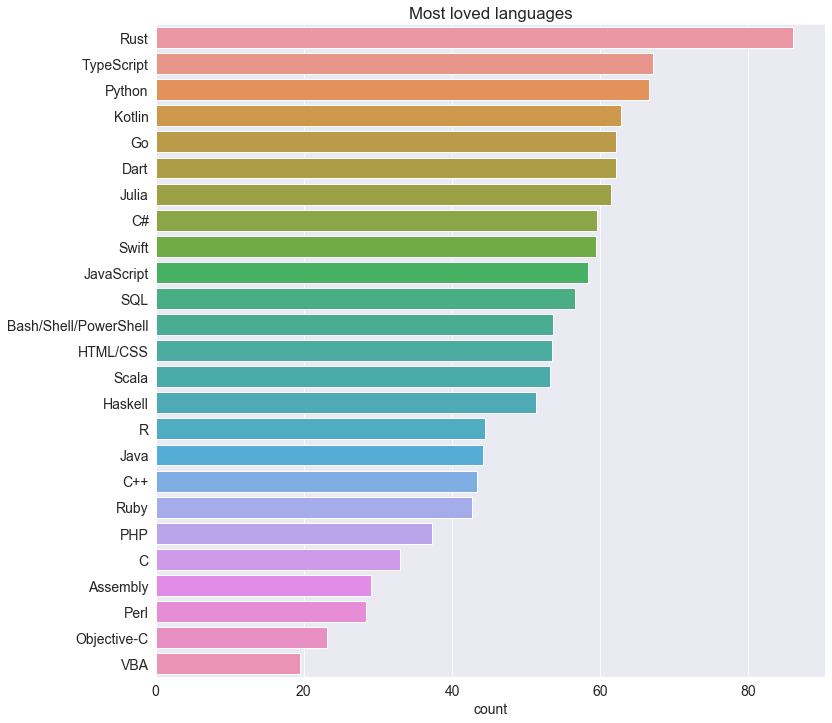

In [240]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been StackOverflow's most-loved language for four years in a row. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

##### Q: What are the most dreaded languages, i.e., languages which people have used in the past year but do not want to learn/use over the next year?

In [241]:
languages_dreaded_df = languages_worked_df & ~languages_interested_df

In [242]:
languages_dreaded_percentages = (languages_dreaded_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

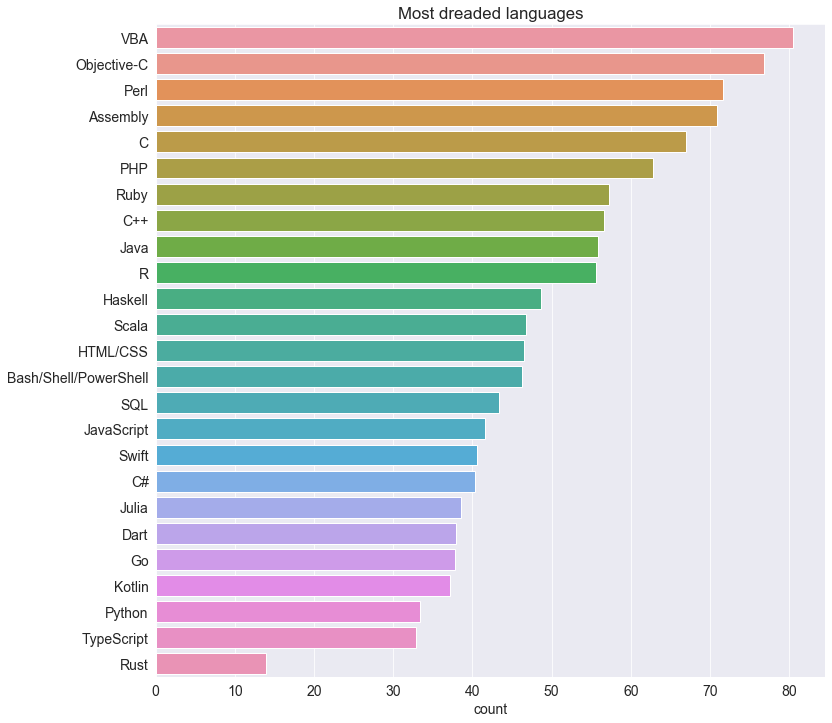

In [243]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_dreaded_percentages, y=languages_dreaded_percentages.index)
plt.title("Most dreaded languages");
plt.xlabel('count');

**Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

To answer this question, we'll need to use the groupby data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.


In [244]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [245]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [246]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

##### Q: Which role has the highest average number of hours worked per week? Which one has the lowest?

In [254]:
roles = list(dev_type_df)
roles

['Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Developer, mobile',
 'Designer',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, QA or test',
 'DevOps specialist',
 'Developer, game or graphics',
 'Database administrator',
 'Developer, embedded applications or devices',
 'Engineer, data',
 'Educator',
 'System administrator',
 'Engineering manager',
 'Product manager',
 'Data or business analyst',
 'Academic researcher',
 'Data scientist or machine learning specialist',
 'Scientist',
 'Senior executive/VP',
 'Engineer, site reliability',
 'Marketing or sales professional']

In [249]:
temp_role_df = survey_df.join(dev_type_df)

In [257]:
role_workhours = {}
for i in roles:
    role_workhours[i] = temp_role_df['WorkWeekHrs'].where(temp_role_df[i]).mean()

In [258]:
role_workhours

{'Developer, desktop or enterprise applications': 40.53157229524773,
 'Developer, full-stack': 40.086612373737374,
 'Developer, mobile': 40.2325147579693,
 'Designer': 40.629767324228624,
 'Developer, front-end': 39.81997004592958,
 'Developer, back-end': 40.009924703410235,
 'Developer, QA or test': 40.80673369896405,
 'DevOps specialist': 41.33108761904762,
 'Developer, game or graphics': 39.85250596658711,
 'Database administrator': 41.17663611170326,
 'Developer, embedded applications or devices': 40.79794944544751,
 'Engineer, data': 41.2050198019802,
 'Educator': 41.0022514489523,
 'System administrator': 41.112838158519224,
 'Engineering manager': 43.13771036090835,
 'Product manager': 42.969179143004645,
 'Data or business analyst': 41.34869691119691,
 'Academic researcher': 40.328058103975536,
 'Data scientist or machine learning specialist': 41.23711656441718,
 'Scientist': 41.6458052663809,
 'Senior executive/VP': 46.39939024390244,
 'Engineer, site reliability': 41.70233455

the highest average number of hours worked per week has Senior executive/VP, the lowest - Developer, game or graphics

##### Q: How do the hours worked compare between freelancers and developers working full-time?

In [259]:
freelance_workhours = temp_role_df['WorkWeekHrs'].where(temp_role_df["Employment"].str.contains("freelancer")).mean()
freelance_workhours

40.114209320091675

In [260]:
fulltime_workhours = temp_role_df['WorkWeekHrs'].where(temp_role_df["Employment"].str.contains("full-time")).mean()
fulltime_workhours

40.424072103353346

The number of work hours is a little more for full-time workers

**Q: How important is it to start young to build a career in programming?**

Let's create a scatter plot of Age vs. YearsCodePro (i.e., years of coding experience) to answer this question.


In [261]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

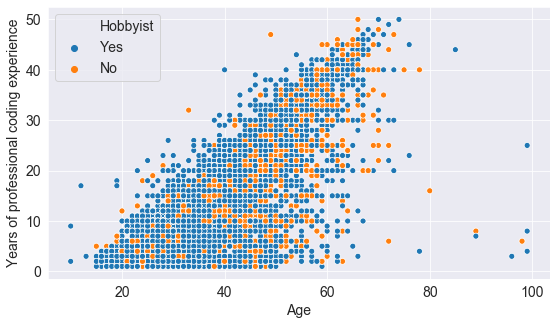

In [262]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can start programming professionally at any age. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the Age1stCode column to see when the respondents tried programming for the first time.


As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.